## Introdução

Olá Cientista de Dados! 

A partir desta aula, iremos explorar outras bibliotecas para aumentar o seu repertório de visualizações e também, praticar a manipulação de dados com pandas.

Nesta aula, vamos aprender a plotar um mapa de rede, ou network mapping.

## Problema

O gráfico chamado de mapa de rede ou network mapping tem o objetivo de demonstrar relacionamentos entre categorias dos nossos dados. A utilização mais comum é a de demonstrar como pessoas se conectam nas redes sociais. Também podemos utilizar em outras situações onde dois elementos tem algum tipo de relacionamento, como por exemplo, partidas de futebol. O nosso problema gira em torno dessa temática: queremos mostrar em um gráfico quais times tem um histórico de enfrentamento.

## Passo a Passo

### Carregando Bibliotecas


Como sempre, iniciamos carregando nossas bibliotecas. Aqui, utilizaremos uma nova, chamada NetworkX e não carregamos a seaborn, que não será utilizada.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

### Carregando dados

Depois, carregamos nossos dados. Utilizaremos dados de confrontos de seleções no futebol.

In [9]:

df = pd.read_json('https://raw.githubusercontent.com/labeduc/datasets/main/worldcup/worldcup.json')

df.sample(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
16723,2014-05-16 00:00:00+00:00,Kuwait,Kyrgyz Republic,Asia,Asia,108,146,282,147,2,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,1994-07-14 00:00:00+00:00,Japan,Ghana,Asia,Africa,52,26,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10102,2006-12-01 00:00:00+00:00,Ethiopia,Malawi,Africa,Africa,100,94,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3309,1998-09-28 00:00:00+00:00,Australia,Cook Islands,Oceania,Oceania,36,193,0,0,16,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7353,2003-09-26 00:00:00+00:00,Malaysia,Indonesia,Asia,Asia,117,92,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plotando o gráfico

Agora, vamos entender como um network mapping funciona. O network mapping precisa de duas coisas:
- nodos: os elementos que queremos verificar o relacionamento. No nosso caso, serão os times
- vertices: a conexão entre os elementos. No nosso caso são as partidas. Os vértices podem ou não ter um peso, o que pode refletir na largura do vértice, por exemplo. Vamos iniciar sem considerar o peso.

Então, nosso primeiro passo será organizar nossos dados nestas duas entidades: nodos e vertices.

In [10]:
# Criando listas vazias para os nodos e para as conexões
nodes = []
edges = []

# Popula a lista de nodos com base nos respondentes
for item in df["home_team"]:
  if item not in nodes:
    nodes.append(item)

# Termina de popular a lista de nodos com os targets
for item in df["away_team"]:
  if item not in nodes:
    nodes.append(item)

# Popula a lista de conexões com o respondente e o target
for idx, item in enumerate(df["home_team"]):
  edges.append([item, df["away_team"][idx]])

Depois disso, vamos a plotagem do gráfico. Basicamente, carregamos os nodos e vertices no objeto do gráfico e em seguida, plotamos.

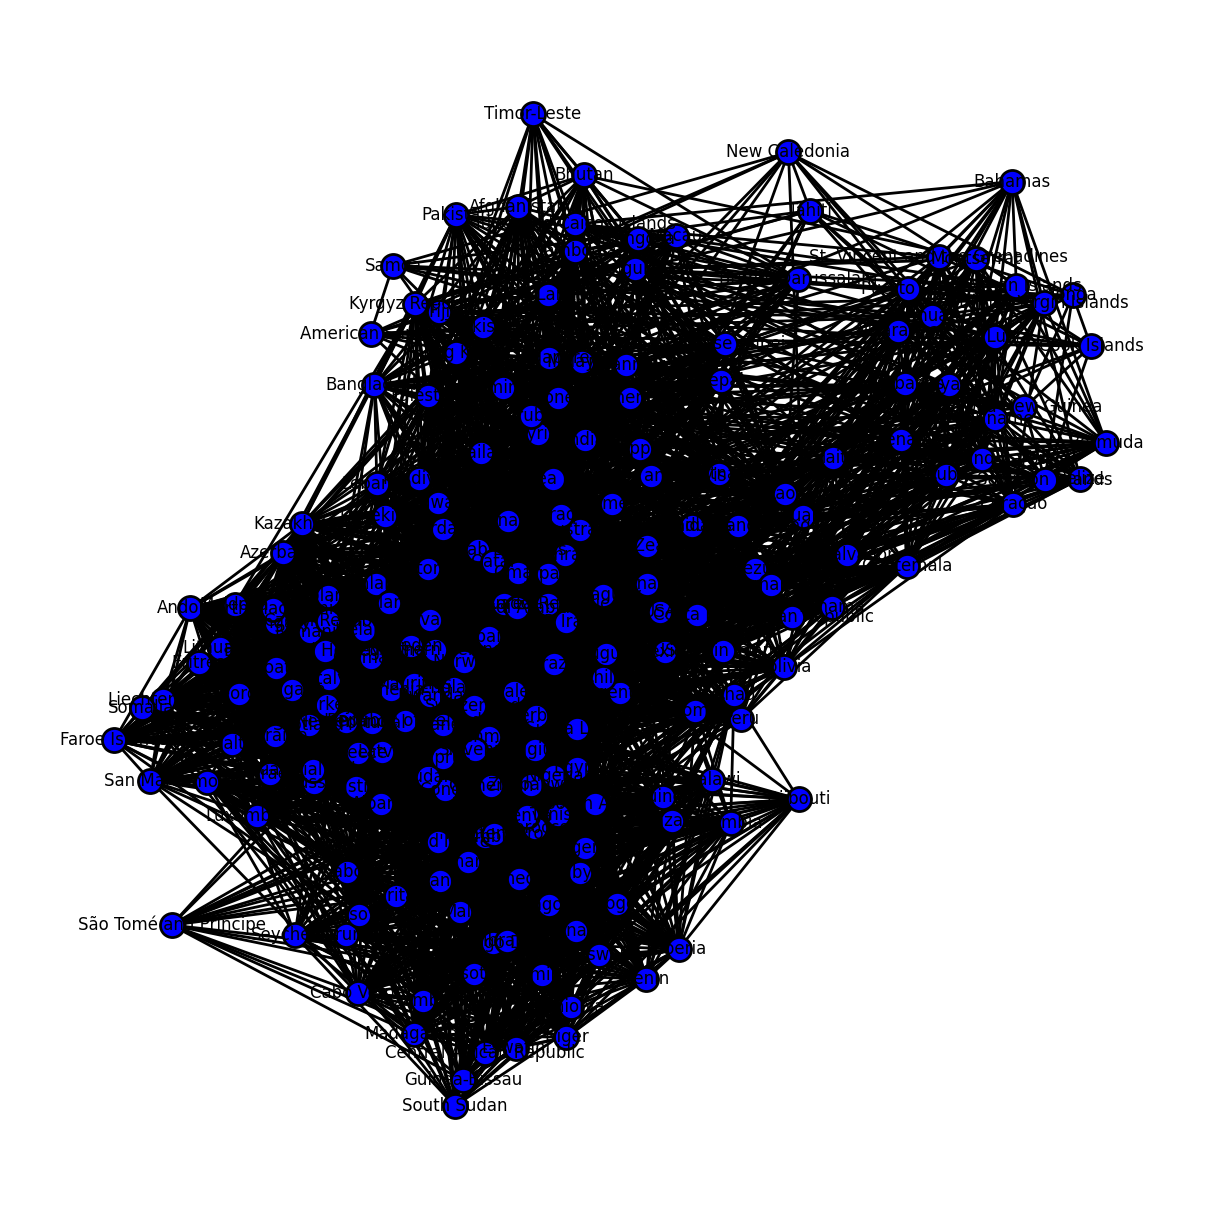

In [17]:
# Cria o objeto que representa o network map
net = nx.Graph()

# Adiciona os nodos
for item in nodes:
  net.add_node(item)

# Adiciona as conexões
for item in edges:
  net.add_edge(item[0], item[1], length=1000)

# Cria um objeto para configurar a área de plotagem
pos = nx.spring_layout(net, seed=3068, k=0.8, iterations=50) 

# Ajustes de configuração para plotagem
options = {
    "font_size": 12,
    "node_size": 300,
    "node_color": "blue",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
    "with_labels": True
}

# Plota o gráfico
plt.rcParams["figure.figsize"] = [12.00, 12.00]
plt.rcParams["figure.autolayout"] = True
nx.draw(net, pos=pos, **options)
plt.show()

Ficou um gráfico bem poluído, não? Uma das razões são os dados, que apresentam uma repetição, porque cada partida é uma linha. E se fizessemos um agrupamento, contando o número de partidas e eliminamos os confrontos que ocorreram menos de 5 vezes?

In [20]:
sub_df = df[["home_team", "away_team", "home_team_score"]].groupby(["home_team", "away_team"]).count().reset_index()

sub_df

,home_team,away_team,home_team_score
0,Afghanistan,Bangladesh,2
1,Afghanistan,Bhutan,3
2,Afghanistan,Cambodia,3
3,Afghanistan,Chinese Taipei,1
4,Afghanistan,India,1
...,...,...,...
9006,Zimbabwe,Tanzania,4
9007,Zimbabwe,Togo,1
9008,Zimbabwe,Tunisia,1
9009,Zimbabwe,Uganda,3


Agora, vamos tentar novamente.

In [86]:
# Criando listas vazias para os nodos e para as conexões
nodes = []
edges = []

# Popula a lista de nodos com base nos respondentes
for item in sub_df["home_team"]:
  if item not in nodes:
    nodes.append(item)

# Termina de popular a lista de nodos com os targets
for item in sub_df["away_team"]:
  if item not in nodes:
    nodes.append(item)

# Popula a lista de conexões com o respondente e o target
for idx, item in enumerate(sub_df["home_team"]):
  if sub_df["home_team_score"][idx] > 5:
    edges.append([item, sub_df["away_team"][idx]])

/Users/wpcortes/Work/blog/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


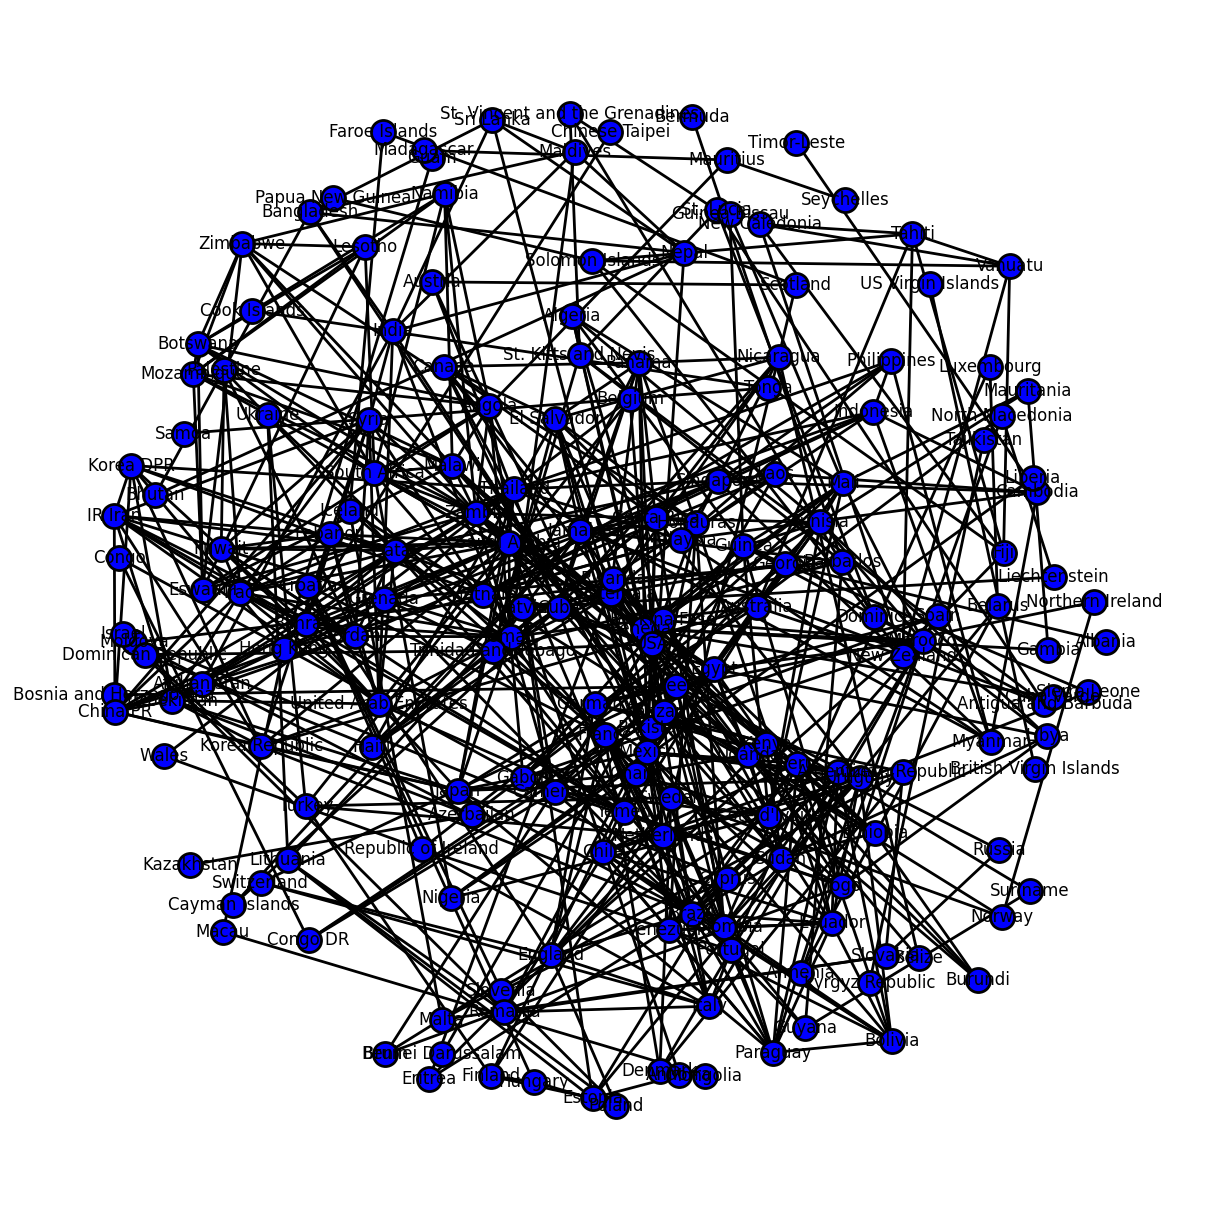

In [87]:
# Cria o objeto que representa o network map
net = nx.Graph()

list_valid_nodes = []

# Adiciona as conexões
for item in edges:
  # se a partida foi listada aqui, 
  # adiciona na lista de nodos válidos
  if item[0] not in list_valid_nodes:
    list_valid_nodes.append(item[0])
  if item[1] not in list_valid_nodes:
    list_valid_nodes.append(item[1])
  net.add_edge(item[0], item[1], length=1000)

# Adiciona os nodos
for item in nodes:
  # adiciona um nodo somente se está 
  # na lista de nodos válidos
  if item in list_valid_nodes:
    net.add_node(item)

# Cria um objeto para configurar a área de plotagem
pos = nx.spring_layout(net, seed=3068, k=0.8, iterations=50) 

# Ajustes de configuração para plotagem
options = {
    "font_size": 12,
    "node_size": 300,
    "node_color": "blue",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
    "with_labels": True
}

# Plota o gráfico
plt.rcParams["figure.figsize"] = [12.00, 12.00]
plt.rcParams["figure.autolayout"] = True
nx.draw(net, pos=pos, **options)
plt.show()

Ainda temos muitos dados para mostrar. Então, quem sabe filtramos apenas os confrontos do Brasil, para termos algo mais simples de visualizar? Também vamos introduzir modificações no peso das conexões (número de confrontos) e no tamanho do nodo do Brazil, para diferenciar o nodo inicial.

In [26]:
brazil_df = sub_df.query("home_team == 'Brazil' or away_team == 'Brazil'").reset_index()

brazil_df

,index,home_team,away_team,home_team_score
0,81,Algeria,Brazil,1
1,152,Andorra,Brazil,1
2,287,Argentina,Brazil,15
3,400,Australia,Brazil,3
4,465,Austria,Brazil,2
...,...,...,...,...
118,8591,United Arab Emirates,Brazil,1
119,8654,Uruguay,Brazil,9
120,8746,Venezuela,Brazil,5
121,8825,Wales,Brazil,2


In [84]:
# Criando listas vazias para os nodos e para as conexões
nodes = []
edges = []

# Popula a lista de nodos com base nos times da casa
for item in brazil_df["home_team"]:
  if item not in nodes:
    nodes.append(item)

# Termina de popular a lista de nodos com os times visitantes
for item in brazil_df["away_team"]:
  if item not in nodes:
    nodes.append(item)

# Popula a lista de conexões com os confrontos do Brasil 
# que ocorreram mais de cinco vezes
for idx, item in enumerate(brazil_df["home_team"]):
  if brazil_df['home_team_score'][idx] > 5:
    edges.append([item, brazil_df["away_team"][idx], brazil_df["home_team_score"][idx]])

/Users/wpcortes/Work/blog/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


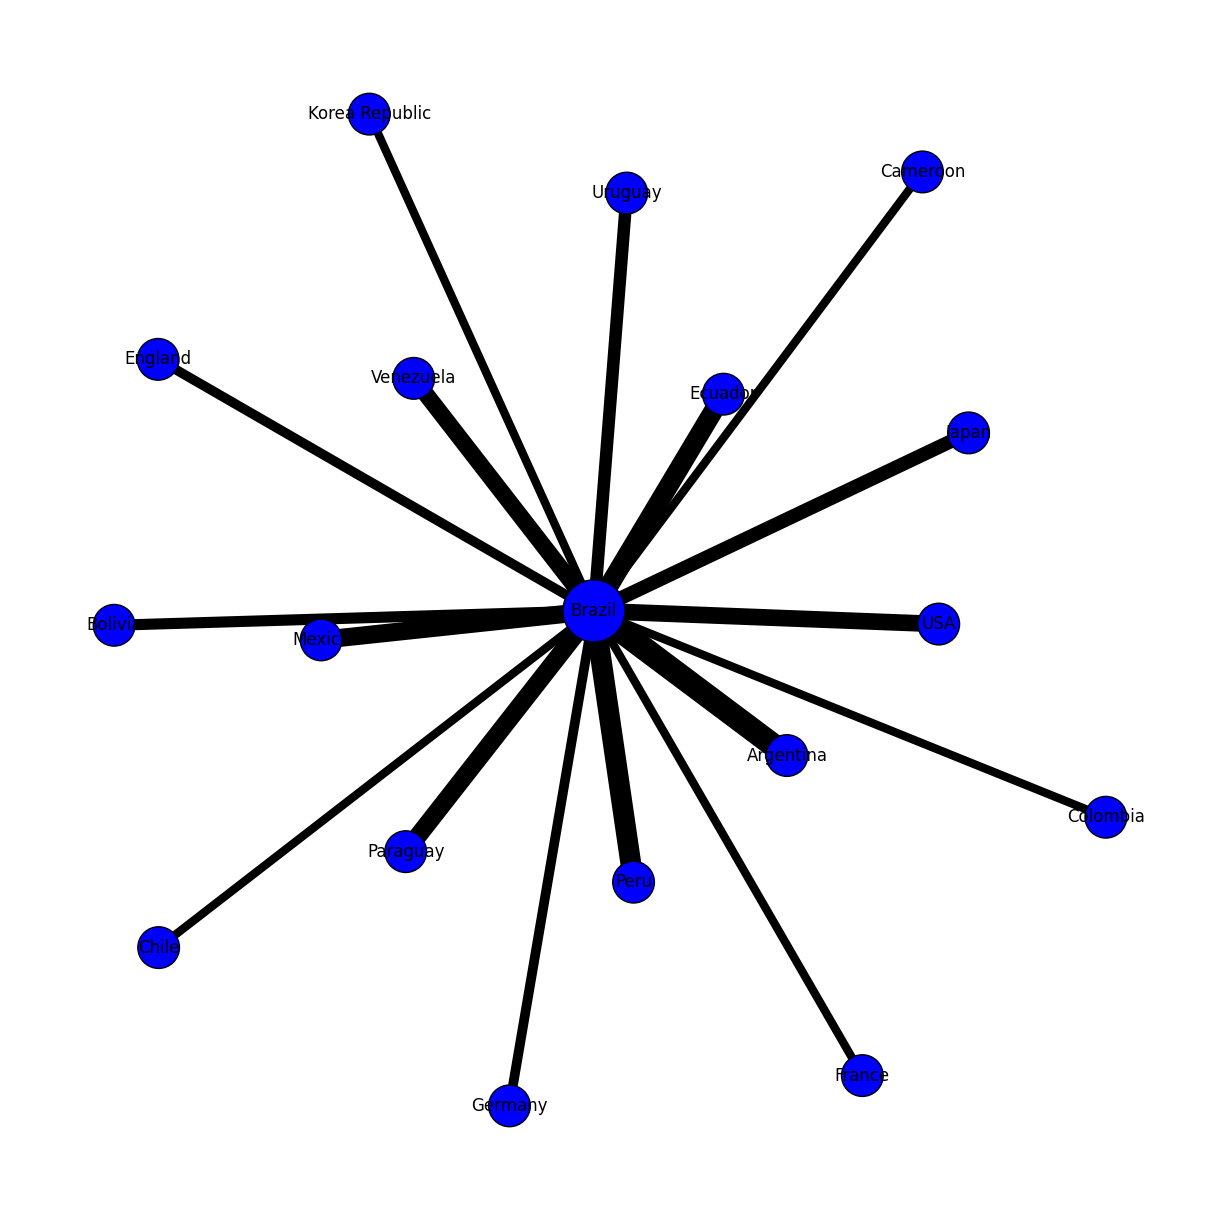

In [85]:
# Cria o objeto que representa o network map
net = nx.Graph()

list_valid_nodes = []

# Adiciona as conexões
for item in edges:
  # se a partida foi listada aqui, 
  # adiciona na lista de nodos válidos
  if item[0] not in list_valid_nodes:
    list_valid_nodes.append(item[0])
  if item[1] not in list_valid_nodes:
    list_valid_nodes.append(item[1])
  net.add_edge(item[0], item[1], length=1000, weight=item[2])

# Adiciona os nodos
for item in nodes:
  # adiciona um nodo somente se está 
  # na lista de nodos válidos
  if item in list_valid_nodes:
    # adicionamos uma formula para controlar o tamanho dos nodos.
    net.add_node(item, size=(2000 if item == 'Brazil' else 900))

# Cria um objeto para configurar a área de plotagem
pos = nx.spring_layout(net, seed=3068, k=0.8, iterations=50) 

# Cria o array dos pesos de cada conexão
wedges = net.edges()
weights = [net[u][v]['weight'] for u,v in wedges]

# Cria o array de tamanhos de cada nodo
nodes = net.nodes()
sizes = [nodes[u]['size'] for u in nodes]

# Ajustes de configuração para plotagem
options = {
    "font_size": 12,
    "node_size": sizes, # usa o array de tamanhos
    "node_color": "blue",
    "edgecolors": "black",
    "width": weights, # usa o array de pesos
    "with_labels": True
}

# Plota o gráfico
plt.rcParams["figure.figsize"] = [12.00, 12.00]
plt.rcParams["figure.autolayout"] = True
nx.draw(net,pos, **options)
plt.show()

## Conclusão

Conseguimos fazer a plotagem do nosso gráfico e, se investirmos um pouco mais de tempo, é possível deixa-lo com uma melhor apresentação. Algumas considerações:
- este tipo de gráfico é mais adequado para permitir a interação do usuário, através de filtros, destaque de caminhos, etc. Neste caso, você acabará usando outras bibliotecas (plotly em python) ou até outra linguagem (javascript e sua biblioteca d3.js são bem populares);
- Quando pensamos no layout de distribuição dos nodos, existem vários que você pode tentar, dê uma olhada na documentação
- Pensando na utilização do gráfico estático, as recomendações de um gráfico de pizza também se aplicam para este gráfico.

A documentação da biblioteca NetworkX pode ser encontrada [aqui](https://networkx.org/documentation/stable/index.html).


### Navegação

| [< Anterior](/posts/data-110/index.html) 	| \| | [Próximo >](/posts/data-112/index.html) 	|
|---------- |---|--------:	|